# Task: Cancer Diagnosis using NN

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
data = pd.read_csv('Cancer_data.csv')

In [7]:
data.head()
data[data['diagnosis'] == 'B']


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [8]:
data.shape

(569, 32)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
# Get the x and y data
x = data.iloc[:, 2:]
y = pd.DataFrame(data['diagnosis'])

## One hot encoder

In [12]:
from sklearn.preprocessing import LabelEncoder

### encode the target

In [13]:
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y.values.ravel())

## Feature Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
x_scaled = sc.fit_transform(x)

## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encode, test_size = 0.2,\
                                                    random_state = 0)

## size/shape of dataframe

In [18]:
n_samples = x_train.shape[0]
n_features = x_train.shape[1]

## Make the NN using sequential API

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(n_features,)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\Tommy\anaconda3\envs\machine_learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Make the NN using functional API

In [20]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(n_features,))
hidden_layer_1 = Dense(units=512, kernel_initializer='uniform', activation='tanh')(input_layer)
hidden_layer_2 = Dense(units=256, kernel_initializer='uniform', activation='sigmoid')(hidden_layer_1)
output_layer = Dense(units=1, kernel_initializer='uniform', activation='sigmoid')(hidden_layer_2)
my_classifier = Model(inputs=input_layer, outputs=output_layer)
# Compiling the ANN
my_classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])


## plot the model

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(my_classifier, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [26]:
my_classifier.summary()




Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,457 (576.00 KB)

 Trainable params: 147,457 (576.00 KB)

 Non-trainable params: 0 (0.00 B)

## Fitting the ANN to the Training set

In [28]:
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 100)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6458 - loss: 0.6594 - val_accuracy: 0.6044 - val_loss: 0.6609
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6465 - loss: 0.6431 - val_accuracy: 0.6044 - val_loss: 0.6441
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6291 - loss: 0.6376 - val_accuracy: 0.6044 - val_loss: 0.6529
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - loss: 0.5993 - val_accuracy: 0.6044 - val_loss: 0.6210
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6693 - loss: 0.5838 - val_accuracy: 0.6374 - val_loss: 0.5924
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6492 - loss: 0.5848 - val_accuracy: 0.6374 - val_loss: 0.5716
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6953 - loss: 0.5379 - val_accuracy: 0.6813 - val_loss: 0.5442
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7433 - loss: 0.4914 - val_accuracy: 0.8791 - v

## Make predictions
### Predicting the Train set results

In [29]:
# Make predictions
# Predicting the Test set results
y_pred_train = my_classifier.predict(x_train)
y_pred_train = (y_pred_train > 0.5)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


### Predicting the Test set results

In [30]:
# Predicting the Test set results
y_pred_test = my_classifier.predict(x_test)
y_pred_test = (y_pred_test > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


### Making the Confusion Matrix

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[64,  3],
       [ 2, 45]], dtype=int64)

### list all the data in history

In [33]:
# list all the data in history
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Plot the accuracy for both train and validation set

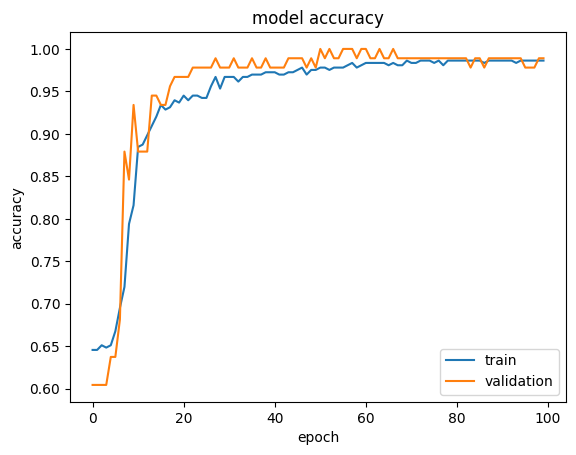

In [34]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### Plot the loss for both train and validation set

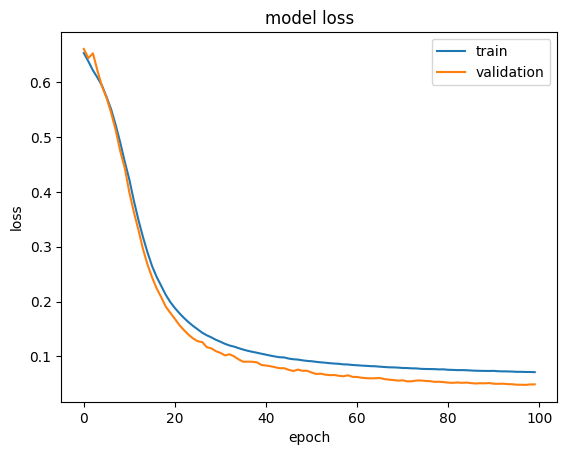

In [35]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

## Implement Callbacks

In [36]:
import tensorflow as tf

In [41]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}): # this method will be called everytime at the end of each epoch
        if(logs.get('loss')<0.05):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True
            
callback = myCallback()

In [42]:
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 100, callbacks= [callback])

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0581 - val_accuracy: 0.9780 - val_loss: 0.0404
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9693 - loss: 0.0821 - val_accuracy: 0.9780 - val_loss: 0.0397
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9798 - loss: 0.0652 - val_accuracy: 0.9780 - val_loss: 0.0408
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.1111 - val_accuracy: 0.9780 - val_loss: 0.0401
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9789 - loss: 0.0580 - val_accuracy: 0.9780 - val_loss: 0.0400
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.0429 - val_accuracy: 0.9780 - val_loss: 0.0401
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9727 - loss: 0.0933 - val_accuracy: 0.9780 - val_loss: 0.0400
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.0582 - val_accuracy: 0.9780 - v